In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from rfpimp import importances
%matplotlib inline
pd.set_option("display.max_columns", 2000)

In [3]:
df_full=pd.read_csv('data/Seasons_Stats.csv')

In [4]:
df_full.drop(columns='Unnamed: 0', inplace=True)

In [5]:
# Year - Season
# Player - name
# Pos - Position
# Age - Age
# Tm - Team
# G - Games
# GS - Games Started
# MP - Minutes Played
# PER - Player Efficiency Rating
# TS% - True Shooting %
# 3PAr - 3-Point Attempt Rate
# FTr - Free Throw Rate
# ORB% - Offensive Rebound Percentage
# DRB% - Defensive Rebound Percentage
# TRB% - Total Rebound Percentage
# AST% - Assist Percentage
# STL% - Steal Percentage
# BLK% - Block Percentage
# TOV% - Turnover Percentage
# USG% - Usage Percentage
# blanlempty
# OWS - Offensive Win Shares
# DWS - Defensive Win Shares
# WS - Win Shares
# WS/48Win Shares Per 48 Minutes
# blank2
# OBPM - Offensive Box Plus/Minus
# DBPM - Defensive Box Plus/Minus
# BPM - Box Plus/Minus
# VORPValue Over Replacement
# FG - Field Goals
# FGA - Field Goal Attempts
# FG% - Field Goal Percentage
# 3P - 3-Point Field Goals
# 3PA - 3-Point Field Goal Attempts
# 3P% - 3-Point Field Goal Percentage
# 2P - 2-Point Field Goals
# 2PA - 2-Point Field Goal Attempts
# 2P% - 2-Point Field Goal Percentage
# eFG% - Effective Field Goal Percentage
# FT - Free Throws
# FTA - Free Throw Attempts
# FT% - Free Throw Percentage
# ORB - Offensive Rebounds
# DRB - Defensive Rebounds
# TRB - Total Rebounds
# AST - Assists
# STL - Steals
# BLK - Blocks
# TOV - Turnovers
# PF - Personal Fouls
# PTS - Points

# https://www.basketball-reference.com/about/glossary.html for additional data

# use the past 12 years --> 2005 - 2017


In [7]:
df=df_full[df_full['Year']>=2005]

In [8]:
df.shape

(7603, 52)

In [9]:
df_full.shape

(24691, 52)

In [1190]:
df_full.sample(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24050,2016.0,Anderson Varejao,C,33.0,GSW,22.0,0.0,186.0,11.0,0.48,0.00,0.60,8.0,20.2,14.5,10.5,1.3,2.0,9.0,15.5,NaN,0.2,0.3,0.5,0.12,NaN,-3.3,0.8,-2.5,0.0,21.0,48.0,0.44,0.0,0.0,NaN,21.0,48.0,0.44,0.44,16.0,29.0,0.55,13.0,37.0,50.0,15.0,5.0,5.0,6.0,35.0,58.0
18815,2008.0,Aaron Brooks,PG,23.0,HOU,51.0,0.0,608.0,13.1,0.54,0.48,0.22,2.5,7.9,5.2,23.5,1.1,0.6,15.1,21.8,NaN,0.6,0.8,1.4,0.11,NaN,0.0,-1.8,-1.8,0.0,93.0,225.0,0.41,36.0,109.0,0.33,57.0,116.0,0.49,0.49,42.0,49.0,0.86,13.0,43.0,56.0,87.0,13.0,5.0,44.0,69.0,264.0
18021,2006.0,Jameer Nelson,PG,23.0,ORL,62.0,33.0,1784.0,19.5,0.57,0.23,0.25,2.8,9.5,6.2,31.5,2.1,0.4,15.6,25.1,NaN,3.5,1.4,4.9,0.13,NaN,3.6,-1.4,2.2,1.9,347.0,719.0,0.48,70.0,165.0,0.42,277.0,554.0,0.50,0.53,141.0,181.0,0.78,39.0,141.0,180.0,302.0,70.0,9.0,148.0,174.0,905.0
10237,1991.0,Clifford Lett,PG,25.0,SAS,7.0,0.0,99.0,6.9,0.52,0.03,0.31,1.2,6.4,3.9,9.8,1.0,0.6,19.5,17.2,NaN,-0.1,0.1,0.0,0.01,NaN,-4.9,-1.4,-6.4,-0.1,14.0,29.0,0.48,0.0,1.0,0.00,14.0,28.0,0.50,0.48,6.0,9.0,0.67,1.0,6.0,7.0,7.0,2.0,1.0,8.0,9.0,34.0
22425,2014.0,Luol Deng,SF,28.0,CLE,40.0,40.0,1353.0,14.0,0.50,0.25,0.28,4.8,12.2,8.4,12.0,1.4,0.3,8.8,20.6,NaN,1.3,0.9,2.2,0.08,NaN,0.1,-0.8,-0.6,0.5,211.0,506.0,0.42,40.0,127.0,0.32,171.0,379.0,0.45,0.46,111.0,144.0,0.77,59.0,144.0,203.0,98.0,38.0,5.0,55.0,58.0,573.0
5898,1980.0,Dwight Jones,PF,27.0,CHI,53.0,NaN,1170.0,14.9,0.58,0.00,0.43,8.2,20.0,14.2,11.5,1.0,1.8,18.2,19.6,NaN,1.3,1.1,2.4,0.10,NaN,-0.7,0.1,-0.6,0.4,207.0,387.0,0.54,0.0,0.0,NaN,207.0,387.0,0.54,0.54,119.0,165.0,0.72,83.0,213.0,296.0,90.0,24.0,37.0,102.0,159.0,533.0
20134,2010.0,Al Harrington,PF,29.0,NYK,72.0,15.0,2195.0,16.8,0.55,0.40,0.31,4.5,16.7,10.5,8.6,1.4,0.9,10.1,26.8,NaN,2.2,1.3,3.5,0.08,NaN,0.7,-2.6,-1.9,0.1,448.0,1030.0,0.43,140.0,409.0,0.34,308.0,621.0,0.50,0.50,240.0,317.0,0.76,88.0,317.0,405.0,110.0,62.0,26.0,132.0,209.0,1276.0
3980,1974.0,Ted Manakas,SG,22.0,KCO,5.0,NaN,45.0,7.2,0.51,NaN,0.40,0.0,7.0,3.5,5.8,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.01,NaN,-5.5,-2.3,-7.7,-0.1,4.0,10.0,0.40,NaN,NaN,NaN,4.0,10.0,0.40,0.40,4.0,4.0,1.00,0.0,3.0,3.0,2.0,1.0,0.0,NaN,4.0,12.0
19973,2010.0,Chauncey Billups,PG,33.0,DEN,73.0,73.0,2490.0,20.2,0.60,0.42,0.53,1.2,9.3,5.3,26.1,1.7,0.3,13.0,24.3,NaN,7.7,1.7,9.5,0.18,NaN,5.0,-1.9,3.1,3.2,402.0,962.0,0.42,157.0,407.0,0.39,245.0,555.0,0.44,0.50,466.0,512.0,0.91,25.0,203.0,228.0,409.0,82.0,9.0,177.0,153.0,1427.0
8397,1987.0,Chris Engler,C,27.0,TOT,30.0,0.0,195.0,11.0,0.50,0.00,0.31,13.3,19.6,16.4,5.5,1.2,3.3,17.1,14.5,NaN,0.0,0.2,0.3,0.07,NaN,-3.1,0.9,-2.3,0.0,23.0,51.0,0.45,0.0,0.0,NaN,23.0,51.0,0.45,0.45,12.0,16.0,0.75,23.0,34.0,57.0,8.0,5.0,11.0,12.0,33.0,58.0


In [10]:
# df_coach=pd.read_csv('data/NBA_head_coaches.csv.xls')

In [11]:
# df_coach.info()

In [12]:
# splitting the teams into a list of years

In [13]:
# df_coach['Teams']=df_coach['Teams'].str.split(',')

In [14]:
# df.head()

In [15]:
# df_coach[df_coach['Name']=='Rick Adelman']

In [16]:
df['Year']=df['Year'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
#Scarping for coaches

In [18]:
 req = requests.get('https://www.basketball-reference.com/coaches/NBA_stats.html')

In [19]:
content=req.content

In [20]:
soup=BeautifulSoup(content) 

In [21]:
table=soup.find('table');

In [22]:
table.find_all('a')[1].text

'Richie Adubato'

In [23]:
coach_name=[]
for element in table.find_all('a'):
    coach_name.append(element.text)
    

In [24]:
table.find('a').attrs['href']

'/coaches/adelmri01c.html'

In [25]:
table.find_all('a')[0].attrs['href']

'/coaches/adelmri01c.html'

In [31]:
tables=table.find_all('a')

In [27]:
#scarping all of the coach tables

In [35]:
coach_list=[]
for element in tables:
    loc='https://www.basketball-reference.com/' + element.attrs['href']
    raw_coach_tables=requests.get(loc)
    raw_coach_table_content=raw_coach_tables.content
    soup2=BeautifulSoup(raw_coach_table_content) 
    coach_table_content=soup2.find('table')
    coach_list.append(pd.read_html(str(coach_table_content)))
   

In [28]:
#cleaning and merging coach table:

In [74]:
for idx,element in enumerate(coach_list):
#     element[0]=element[0][element[0]['Unnamed: 4_level_0']['G'].astype(str)!='Assistant Coach']
    element[0]['coach_name']=coach_name[idx]
    if idx==0:
        all_coach=element[0]
    else:
#         all_coach=all_coach.append(element[0])
        all_coach=all_coach.append(element[0])    

In [ ]:
# coach_columns={Team: 'Playoffs', 'Tm', Coach_Age: 'Regular Season','Age' , Season: 'Unnamed: 0_level_0','Season', ---,
#                Playoff_games'Unnamed: 11_level_0', 'G' ,---, playoff_wins: 'Unnamed: 12_level_0', 'W', ---,playoff_loses: 'Unnamed: 13_level_0', 'L'
#               ,---, playoff_W/L%: 'Unnamed: 14_level_0', 'W/L%', --- ,season_games:'Unnamed: 4_level_0', 'G', ---, season_wins: 'Unnamed: 5_level_0', 'W',
#               ---,season_loses: 'Unnamed: 6_level_0', 'L', ---, season_W/L% : 'Unnamed: 7_level_0', 'W/L%', --- ,'Unnamed: 8_level_0', 'W > .500',
#               ---, 'Unnamed: 9_level_0', 'Finish'}

In [76]:
len(all_coach.columns)

226

In [140]:
#write raw coach data to csv
all_coach.to_csv('data/coach_raw.csv')

In [105]:
# for element in range(226):
#     print(all_coach.columns[element])
#     print(all_coach[all_coach.columns[element][0]].head())

In [105]:
df_coach=pd.DataFrame()

In [106]:
df_coach['Team']=all_coach['Playoffs']['Tm']

In [107]:
df_coach['coach_age']=all_coach['Regular Season']['Age']

In [108]:
df_coach['coach_name']=all_coach['coach_name']

In [109]:
df_coach['season']=all_coach['Unnamed: 0_level_0']['Season']

In [110]:
df_coach['playoff_games']=all_coach['Unnamed: 11_level_0']['G']

In [111]:
df_coach['playoff_wins']=all_coach['Unnamed: 12_level_0']['W']

In [112]:
df_coach['playoff_loses']=all_coach['Unnamed: 13_level_0']['L']

In [113]:
df_coach['playoff_W/L%']=all_coach['Unnamed: 14_level_0']['W/L%']

In [114]:
df_coach['season_games']=all_coach['Unnamed: 4_level_0']['G']

In [115]:
df_coach['season_wins']=all_coach['Unnamed: 5_level_0']['W']

In [116]:
df_coach['season_loses']=all_coach['Unnamed: 6_level_0']['L']

In [117]:
df_coach['season_W/L%']=all_coach['Unnamed: 7_level_0']['W/L%']

In [118]:
df_coach['season_position']=all_coach['Unnamed: 9_level_0']['Finish']

In [96]:
#remove coaches before season 2005 and remove years = 'Career'

In [129]:
df_coach.dropna(axis=0,inplace=True, thresh=6) #dropped assistant coaches which have less than 6 fields filled

# Continue from here

In [141]:
# writing the coach data to csv:
df_coach.to_csv('data/coach_data_cleaned.csv')

In [102]:
# check to see all the data is in the table?

In [1223]:
df_coach.head()

,Team,coach_age,coach_name,season,playoff_games,playoff_wins,playoff_loses,playoff_W/L%,season_games,season_wins,season_loses,season_W/L%,season_position
6,POR,42.0,Rick Adelman,1989,3.0,0.0,3.0,0.00,35,14.0,21.0,0.40,5.0
7,POR,43.0,Rick Adelman,1990,21.0,12.0,9.0,0.57,82,59.0,23.0,0.72,2.0
8,POR,44.0,Rick Adelman,1991,16.0,9.0,7.0,0.56,82,63.0,19.0,0.77,1.0
9,POR,45.0,Rick Adelman,1992,21.0,13.0,8.0,0.62,82,57.0,25.0,0.69,1.0
10,POR,46.0,Rick Adelman,1993,4.0,1.0,3.0,0.25,82,51.0,31.0,0.62,3.0


In [1224]:
temp=[]
for element in coach_name:
#     if element not in df_coach['coach_name'].values:
    if element not in df_coach['coach_name'].values:
        temp.append(element)
        

In [1225]:
# removing "career" rows

In [1226]:
df_coach=df_coach[df_coach['season']!='Career']

In [1227]:
df_coach['season']=df_coach['season'].apply(lambda x: x[:2]+x[-2:]) #code for fixing ther dates

In [1228]:
#taking only the coach name from the coach table and merging it to the player table
df_temp=pd.DataFrame()
df_temp['Year']=df_coach['season'].astype(int)
df_temp['Tm']=df_coach['Team']
df_temp['coach_name']=df_coach['coach_name']

In [1229]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 6 to 4
Data columns (total 3 columns):
Year          1820 non-null int64
Tm            1820 non-null object
coach_name    1820 non-null object
dtypes: int64(1), object(2)
memory usage: 56.9+ KB


In [1230]:
df_temp.head();

In [1231]:
result=pd.merge(df,df_temp, how='left', on=['Year','Tm'])

In [1232]:
result.head(5); #this is the merged table;

# adding ppg and creating coach dummies

In [1233]:
# creat a ppg column
result['ppg']=result['PTS']/result['G']

In [1234]:
pd.set_option('precision', 2) #setting the number of decimel points

In [1235]:
combined=pd.get_dummies(result, columns=['coach_name'] ) #get dummies for coach column

In [1236]:
combined=combined.drop_duplicates(subset=['Year','Player','G','ppg','MP'])
# (combined['blank2'].isnull()).count() # checking if possible to remove --> all are null so remoiving the column
combined.drop(labels='blank2', axis=1, inplace=True)
combined.drop(labels='blanl', axis=1, inplace=True)

In [1237]:
combined[combined['Player']=='Marcus Williams'];

In [1238]:
tot_player=combined[combined['Tm']=='TOT']['Player'].values

In [1239]:
combined[combined['Player']==tot_player[0]]['Tm']

3       TOT
4       MIA
5       CHA
767     CHI
1368    CHI
1936    TOT
1937    NJN
1938    DAL
2573    MIL
3303    DEN
3955    ORL
Name: Tm, dtype: object

In [1240]:
combined2=combined.copy()

In [1241]:
combined=combined2.copy()

In [1242]:
combined[combined['Player']=='Malik Allen'];

In [1243]:
def remove_tot(combined):
    for name in tot_player:
        temp=combined[combined['Player']==name]
        tot_index=temp[temp['Tm']=='TOT'].index.values
        for idx in tot_index:
            year=temp.loc[idx]['Year']
            year_index=temp[temp['Year']==year].index.values
            year_temp=temp[temp['Year']==year]
            max_year=((year_temp[year_temp['Tm']!='TOT'])['G'].max())
            team=(year_temp[year_temp['G']==max_year])['Tm'].values
            team=str(team)
            team=team[1:-1]
            combined.at[idx,'Tm']=team
            for element in year_index:
                if element==idx:
                    continue
                else:
                    combined.drop(axis=0, index=element, inplace=True)
    return(combined)

In [1244]:
combined=remove_tot(combined)

In [1245]:
#drop players with the same name:
combined=combined.drop_duplicates(subset=['Year','Player'], keep=False)

In [1246]:
combined['Player'].unique;

# pivot matrix

In [658]:
table=combined.pivot(index='Year',columns='Player',values='ppg')

In [660]:
# def pivots(df):
#     table=pd.DataFrame(index=df['Player'].unique(), columns=df['Year'].unique())
#     print(table.index.values)
#     for name in table.index.values:
#         for year in table.columns.values:
#             value=combined[(combined['Player']==name) & (combined['Year']==year)]['ppg'].values

#             if value.size==0:
                
#                 table.at[name,year]='NaN'
#             else:
#                 try:
#                     table.at[name,year]=value.item() 
#                 except:
#                     print(name,year, value)
#                     break
# #            print(combined[(combined['Player']==name) & (combined['Year']==year)]['ppg'].values[0])
            
#     print(table)  
        


# Calculate the past preformance:

In [1247]:
combined['past_year']=combined['Year']-1

In [1248]:
combined['past_year2']=combined['Year']-2

In [1249]:
combined2=combined.copy()

In [1250]:
test4=pd.merge(combined,combined2[['Player','Year','ppg','Age','MP']], how='left', right_on=['Player','Year'], left_on=['Player','past_year'])

In [1251]:
test5=pd.merge(test4,combined[['Player','Year','ppg','Age','MP']], how='left', right_on=['Player','Year'], left_on=['Player','past_year2'])

In [1252]:
test5[test5['Player']=='James Jones'];

In [1253]:
combined=test5

In [1254]:
combined.sample(2)

,Year_x,Player,Pos,Age_x,Tm,G,GS,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ppg_x,coach_name_Alvin Gentry,coach_name_Avery Johnson,coach_name_Bernie Bickerstaff,coach_name_Billy Donovan,coach_name_Bob Hill,coach_name_Bob Weiss,coach_name_Brad Stevens,coach_name_Brendan Malone,coach_name_Brett Brown,coach_name_Brian Hill,coach_name_Brian Shaw,coach_name_Byron Scott,coach_name_Chris Jent,coach_name_Dave Joerger,coach_name_David Blatt,coach_name_David Fizdale,coach_name_Derek Fisher,coach_name_Doc Rivers,coach_name_Don Nelson,coach_name_Doug Collins,coach_name_Dwane Casey,coach_name_Earl Watson,coach_name_Ed Tapscott,coach_name_Eddie Jordan,coach_name_Eric Musselman,coach_name_Erik Spoelstra,coach_name_Flip Saunders,coach_name_Frank Hamblen,coach_name_Frank Vogel,coach_name_Fred Hoiberg,coach_name_George Karl,coach_name_Gregg Popovich,coach_name_Herb Williams,coach_name_Hubie Brown,coach_name_Isiah Thomas,coach_name_J.B. Bickerstaff,coach_name_Jacque Vaughn,coach_name_James Borrego,coach_name_Jason Kidd,coach_name_Jay Triano,coach_name_Jeff Bower,coach_name_Jeff Bzdelik,coach_name_Jeff Hornacek,coach_name_Jeff Van Gundy,coach_name_Jerry Sloan,coach_name_Jim Boylan,coach_name_Jim O'Brien,coach_name_John Kuester,coach_name_John Loyer,coach_name_Johnny Davis,coach_name_Kaleb Canales,coach_name_Keith Smart,coach_name_Kenny Atkinson,coach_name_Kenny Natt,coach_name_Kevin McHale,coach_name_Kevin Pritchard,coach_name_Kiki Vandeweghe,coach_name_Kim Hughes,coach_name_Kurt Rambis,coach_name_Larry Brown,coach_name_Larry Drew,coach_name_Larry Krystkowiak,coach_name_Lawrence Frank,coach_name_Lenny Wilkens,coach_name_Lindsey Hunter,coach_name_Lionel Hollins,coach_name_Luke Walton,coach_name_Marc Iavaroni,coach_name_Mark Jackson,coach_name_Maurice Cheeks,coach_name_Melvin Hunt,coach_name_Michael Cooper,coach_name_Michael Curry,coach_name_Mike Brown,coach_name_Mike Budenholzer,coach_name_Mike D'Antoni,coach_name_Mike Dunlap,coach_name_Mike Dunleavy,coach_name_Mike Fratello,coach_name_Mike Malone,coach_name_Mike Montgomery,coach_name_Mike Woodson,coach_name_Monty Williams,coach_name_Nate McMillan,coach_name_P.J. Carlesimo,coach_name_Pat Riley,coach_name_Paul Silas,coach_name_Paul Westphal,coach_name_Pete Myers,coach_name_Phil Jackson,coach_name_Quin Snyder,coach_name_Randy Wittman,coach_name_Reggie Theus,coach_name_Rick Adelman,coach_name_Rick Carlisle,coach_name_Rudy Tomjanovich,coach_name_Sam Mitchell,coach_name_Sam Vincent,coach_name_Scott Brooks,coach_name_Scott Skiles,coach_name_Stan Van Gundy,coach_name_Steve Clifford,coach_name_Steve Kerr,coach_name_Terry Porter,coach_name_Terry Stotts,coach_name_Tom Barrise,coach_name_Tom Thibodeau,coach_name_Tony Barone,coach_name_Tony Brown,coach_name_Tony DiLeo,coach_name_Tyrone Corbin,coach_name_Tyronn Lue,coach_name_Vinny Del Negro,past_year,past_year2,Year_y,ppg_y,Age_y,MP_y,Year,ppg,Age,MP
5768,2017,R.J. Hunter,SG,23.0,CHI,3.0,0.0,9.0,-3.2,0.00,1.0,0.00,0.0,12.1,6.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,0.0,-0.09,-9.4,-2.1,-11.4,0.0,0.0,1.0,0.00,0.0,1.0,0.0,0.0,0.0,NaN,0.00,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016,2015,2016.0,2.69,22.0,315.0,NaN,NaN,NaN,NaN
865,2006,Kurt Thomas,C,33.0,PHO,53.0,50.0,1411.0,13.1,0.53,0.0,0.23,8.2,24.1,16.3,5.6,0.8,2.7,11.7,15.5,1.3,2.0,3.3,0.11,-2.8,1.5,-1.2,0.3,190.0,391.0,0.49,0.0,0.0,NaN,190.0,391.0,0.49,0.49,75.0,92.0,0.81,102.0,313.0,415.0,57.0,23.0,54.0,57.0,193.0,455.0,8.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1255]:
index=combined['Player'] + combined['Year_x'].astype(str)
combined.set_index(index, inplace=True)

## Creating the feature matrix 

In [1256]:
# select the features I will use:
cols=combined.columns[51:-10].values
combined.columns[-7:-4]

Index(['ppg_y', 'Age_y', 'MP_y'], dtype='object')

In [1257]:
combined.columns[3]

'Age_x'

In [1258]:
cols=np.append(cols,combined.columns[3])

In [1259]:
combined.columns[-5]

'MP_y'

In [1260]:
cols=np.append(cols,combined.columns[-7])

In [1261]:
cols=np.append(cols,combined.columns[-5])

In [1262]:
#using only age, last season minutes played and last season ppg

In [1263]:
combined[cols].sample(2)

,coach_name_Alvin Gentry,coach_name_Avery Johnson,coach_name_Bernie Bickerstaff,coach_name_Billy Donovan,coach_name_Bob Hill,coach_name_Bob Weiss,coach_name_Brad Stevens,coach_name_Brendan Malone,coach_name_Brett Brown,coach_name_Brian Hill,coach_name_Brian Shaw,coach_name_Byron Scott,coach_name_Chris Jent,coach_name_Dave Joerger,coach_name_David Blatt,coach_name_David Fizdale,coach_name_Derek Fisher,coach_name_Doc Rivers,coach_name_Don Nelson,coach_name_Doug Collins,coach_name_Dwane Casey,coach_name_Earl Watson,coach_name_Ed Tapscott,coach_name_Eddie Jordan,coach_name_Eric Musselman,coach_name_Erik Spoelstra,coach_name_Flip Saunders,coach_name_Frank Hamblen,coach_name_Frank Vogel,coach_name_Fred Hoiberg,coach_name_George Karl,coach_name_Gregg Popovich,coach_name_Herb Williams,coach_name_Hubie Brown,coach_name_Isiah Thomas,coach_name_J.B. Bickerstaff,coach_name_Jacque Vaughn,coach_name_James Borrego,coach_name_Jason Kidd,coach_name_Jay Triano,coach_name_Jeff Bower,coach_name_Jeff Bzdelik,coach_name_Jeff Hornacek,coach_name_Jeff Van Gundy,coach_name_Jerry Sloan,coach_name_Jim Boylan,coach_name_Jim O'Brien,coach_name_John Kuester,coach_name_John Loyer,coach_name_Johnny Davis,coach_name_Kaleb Canales,coach_name_Keith Smart,coach_name_Kenny Atkinson,coach_name_Kenny Natt,coach_name_Kevin McHale,coach_name_Kevin Pritchard,coach_name_Kiki Vandeweghe,coach_name_Kim Hughes,coach_name_Kurt Rambis,coach_name_Larry Brown,coach_name_Larry Drew,coach_name_Larry Krystkowiak,coach_name_Lawrence Frank,coach_name_Lenny Wilkens,coach_name_Lindsey Hunter,coach_name_Lionel Hollins,coach_name_Luke Walton,coach_name_Marc Iavaroni,coach_name_Mark Jackson,coach_name_Maurice Cheeks,coach_name_Melvin Hunt,coach_name_Michael Cooper,coach_name_Michael Curry,coach_name_Mike Brown,coach_name_Mike Budenholzer,coach_name_Mike D'Antoni,coach_name_Mike Dunlap,coach_name_Mike Dunleavy,coach_name_Mike Fratello,coach_name_Mike Malone,coach_name_Mike Montgomery,coach_name_Mike Woodson,coach_name_Monty Williams,coach_name_Nate McMillan,coach_name_P.J. Carlesimo,coach_name_Pat Riley,coach_name_Paul Silas,coach_name_Paul Westphal,coach_name_Pete Myers,coach_name_Phil Jackson,coach_name_Quin Snyder,coach_name_Randy Wittman,coach_name_Reggie Theus,coach_name_Rick Adelman,coach_name_Rick Carlisle,coach_name_Rudy Tomjanovich,coach_name_Sam Mitchell,coach_name_Sam Vincent,coach_name_Scott Brooks,coach_name_Scott Skiles,coach_name_Stan Van Gundy,coach_name_Steve Clifford,coach_name_Steve Kerr,coach_name_Terry Porter,coach_name_Terry Stotts,coach_name_Tom Barrise,coach_name_Tom Thibodeau,coach_name_Tony Barone,coach_name_Tony Brown,coach_name_Tony DiLeo,coach_name_Tyrone Corbin,coach_name_Tyronn Lue,coach_name_Vinny Del Negro,Age_x,ppg_y,MP_y
Willie Green2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.0,8.46,1828.0
Arron Afflalo2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,4.91,1234.0


In [1264]:
#using only rows with values
combined_light=combined[~combined['ppg_y'].isna()]

In [1265]:
X=combined_light[cols].values
y=combined_light['ppg_x'].values
X_df=combined_light[cols]
y_df=combined_light['ppg_x']

In [1266]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1267]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=42)

In [1268]:
rf_reg = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)

In [1280]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1281]:
y_pred=rf_reg.predict(X_test)

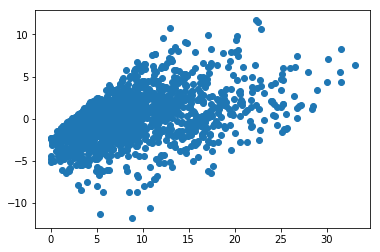

In [1282]:
plt.scatter(y_test,y_test-y_pred)

In [1283]:
mean_squared_error(y_test,y_pred)

8.79141972399872

In [1284]:
np.sqrt(8.79141972399872)

2.9650328369174463

In [1285]:
rf_reg.feature_importances_;

In [1286]:
rf_reg.feature_importances_[:-3].sum()

0.009810438713793558

In [1287]:
cols;

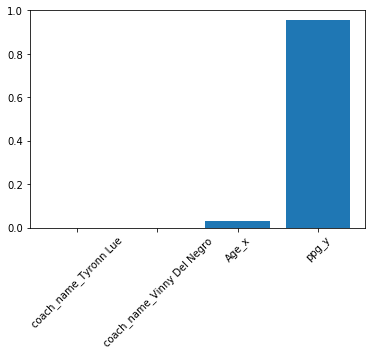

In [1288]:
plt.bar(cols[-5:-1],rf_reg.feature_importances_[-5:-1])
plt.xticks(rotation='45')
plt.show()

# Feature importance using rfpimp

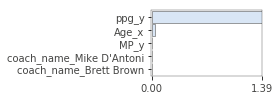

In [1302]:
imp =importances(rf_reg, X_test, y_test, cols) # permutation
viz = plot_importances(imp[:5])
viz.save('plots/test2.png')
viz.view()


In [1301]:
viz.save('plots/test.png')


<Figure size 432x288 with 0 Axes>

In [1290]:
imp

,Importance
Feature,
ppg_y,1.46e+00
Age_x,4.12e-02
MP_y,5.05e-03
coach_name_Mike D'Antoni,1.10e-03
coach_name_Brett Brown,7.36e-04
coach_name_Scott Brooks,2.45e-04
coach_name_George Karl,1.72e-04
coach_name_Jeff Hornacek,1.67e-04
coach_name_Frank Vogel,1.44e-04


# normalizing the data based on player overall preformance

In [1101]:
combined;

In [1053]:
# normalization factor per game:
normalization=(combined.groupby('Player')['ppg_x'].max())

In [1065]:
normalization=pd.DataFrame(index=normalization.index, data=normalization.values, columns=['n_factor'])

In [1066]:
# adding the normalized ppg for each player:
combined=combined.merge(normalization, how='left', on='Player')

In [1070]:
combined['n_ppg_curr']=combined['ppg_x']/combined['n_factor']

In [1082]:
combined['n_ppg_prev']=combined['ppg_y']/combined['n_factor']

In [1086]:
combined[combined['Player']=='A.J. Hammons']

,Year_x,Player,Pos,Age_x,Tm,G,GS,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ppg_x,coach_name_Alvin Gentry,coach_name_Avery Johnson,coach_name_Bernie Bickerstaff,coach_name_Billy Donovan,coach_name_Bob Hill,coach_name_Bob Weiss,coach_name_Brad Stevens,coach_name_Brendan Malone,coach_name_Brett Brown,coach_name_Brian Hill,coach_name_Brian Shaw,coach_name_Byron Scott,coach_name_Chris Jent,coach_name_Dave Joerger,coach_name_David Blatt,coach_name_David Fizdale,coach_name_Derek Fisher,coach_name_Doc Rivers,coach_name_Don Nelson,coach_name_Doug Collins,coach_name_Dwane Casey,coach_name_Earl Watson,coach_name_Ed Tapscott,coach_name_Eddie Jordan,coach_name_Eric Musselman,coach_name_Erik Spoelstra,coach_name_Flip Saunders,coach_name_Frank Hamblen,coach_name_Frank Vogel,coach_name_Fred Hoiberg,coach_name_George Karl,coach_name_Gregg Popovich,coach_name_Herb Williams,coach_name_Hubie Brown,coach_name_Isiah Thomas,coach_name_J.B. Bickerstaff,coach_name_Jacque Vaughn,coach_name_James Borrego,coach_name_Jason Kidd,coach_name_Jay Triano,coach_name_Jeff Bower,coach_name_Jeff Bzdelik,coach_name_Jeff Hornacek,coach_name_Jeff Van Gundy,coach_name_Jerry Sloan,coach_name_Jim Boylan,coach_name_Jim O'Brien,coach_name_John Kuester,coach_name_John Loyer,coach_name_Johnny Davis,coach_name_Kaleb Canales,coach_name_Keith Smart,coach_name_Kenny Atkinson,coach_name_Kenny Natt,coach_name_Kevin McHale,coach_name_Kevin Pritchard,coach_name_Kiki Vandeweghe,coach_name_Kim Hughes,coach_name_Kurt Rambis,coach_name_Larry Brown,coach_name_Larry Drew,coach_name_Larry Krystkowiak,coach_name_Lawrence Frank,coach_name_Lenny Wilkens,coach_name_Lindsey Hunter,coach_name_Lionel Hollins,coach_name_Luke Walton,coach_name_Marc Iavaroni,coach_name_Mark Jackson,coach_name_Maurice Cheeks,coach_name_Melvin Hunt,coach_name_Michael Cooper,coach_name_Michael Curry,coach_name_Mike Brown,coach_name_Mike Budenholzer,coach_name_Mike D'Antoni,coach_name_Mike Dunlap,coach_name_Mike Dunleavy,coach_name_Mike Fratello,coach_name_Mike Malone,coach_name_Mike Montgomery,coach_name_Mike Woodson,coach_name_Monty Williams,coach_name_Nate McMillan,coach_name_P.J. Carlesimo,coach_name_Pat Riley,coach_name_Paul Silas,coach_name_Paul Westphal,coach_name_Pete Myers,coach_name_Phil Jackson,coach_name_Quin Snyder,coach_name_Randy Wittman,coach_name_Reggie Theus,coach_name_Rick Adelman,coach_name_Rick Carlisle,coach_name_Rudy Tomjanovich,coach_name_Sam Mitchell,coach_name_Sam Vincent,coach_name_Scott Brooks,coach_name_Scott Skiles,coach_name_Stan Van Gundy,coach_name_Steve Clifford,coach_name_Steve Kerr,coach_name_Terry Porter,coach_name_Terry Stotts,coach_name_Tom Barrise,coach_name_Tom Thibodeau,coach_name_Tony Barone,coach_name_Tony Brown,coach_name_Tony DiLeo,coach_name_Tyrone Corbin,coach_name_Tyronn Lue,coach_name_Vinny Del Negro,past_year,past_year2,Year_y,ppg_y,Age_y,MP_y,Year,ppg,Age,MP,n_factor,n_ppg_curr,n_ppg_prev
5729,2017,A.J. Hammons,C,24.0,DAL,22.0,0.0,163.0,8.4,0.47,0.24,0.48,5.4,20.9,12.8,3.8,0.3,7.2,16.4,17.6,-0.2,0.2,0.0,-1.00e-03,-7.5,1.9,-5.6,-0.1,17.0,42.0,0.41,5.0,10.0,0.5,12.0,32.0,0.38,0.46,9.0,20.0,0.45,8.0,28.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0,2.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.18,1.0,NaN


In [1088]:
# reindexing after merge
index=combined['Player'] + combined['Year_x'].astype(str)
combined.set_index(index, inplace=True)

In [1143]:
combined.sample(5);

# Creating feature matrix and target

In [1141]:
cols;

In [1095]:
cols[-2]='n_ppg_prev'

In [1103]:
cols[-4:]

array(['coach_name_Vinny Del Negro', 'Age_x', 'n_ppg_prev', 'MP_y'],
      dtype=object)

In [1138]:
combined_light=combined[~combined['ppg_y'].isna()]

In [1139]:
combined_light.shape

(4520, 177)

In [1202]:
X=combined_light[cols].values
y=combined_light['n_ppg_curr'].values
X_df=combined_light[cols]
y_df=combined_light['n_ppg_curr']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=42)
rf_reg = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

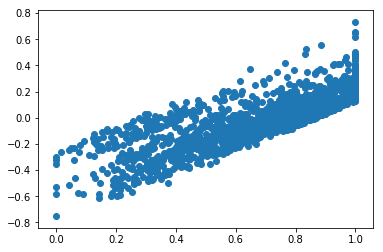

In [1203]:
y_pred=rf_reg.predict(X_test)
plt.scatter(y_test,y_test-y_pred) #basic model after normalizing the data

In [1204]:
mean_squared_error(y_test,y_pred)

0.04460868185339101

In [1205]:
# temp=combined[combined['Player']=='Darius Johnson-Odom'].index
# combined.drop(index=temp, axis=0, inplace=True) used to remove aNaN player

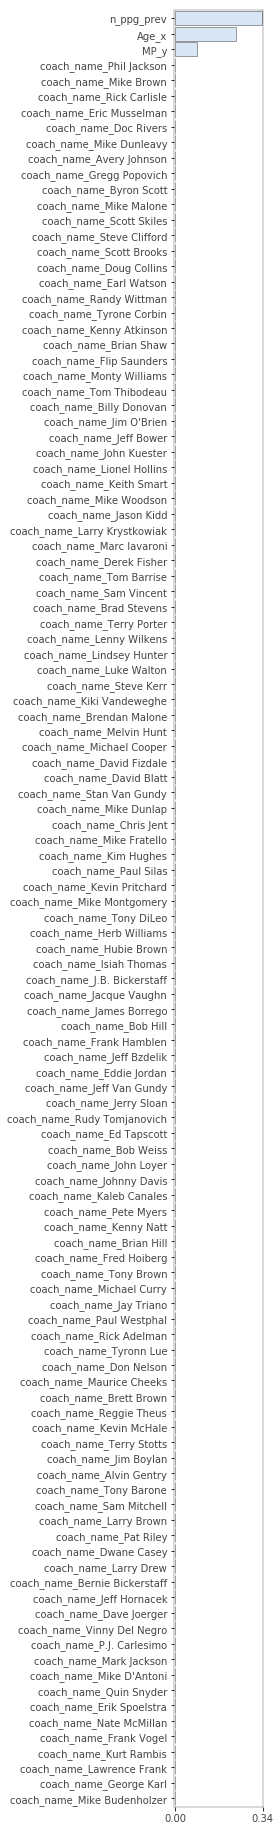

In [1206]:
imp =importances(rf_reg, X_test, y_test, cols) # permutation
viz = plot_importances(imp)
viz.view()

In [1152]:
imp.values[3:].sum()

0.0008766857407299655

In [1153]:
imp.values[0]/imp.values[3:].sum()

array([427.91663289])

In [1207]:
imp.loc['coach_name_Gregg Popovich']

Importance    1.29e-04
Name: coach_name_Gregg Popovich, dtype: float64

In [1208]:
imp.head(25)

,Importance
Feature,
n_ppg_prev,3.40e-01
Age_x,2.40e-01
MP_y,8.66e-02
coach_name_Phil Jackson,4.77e-04
coach_name_Mike Brown,4.24e-04
coach_name_Rick Carlisle,3.62e-04
coach_name_Eric Musselman,3.33e-04
coach_name_Doc Rivers,2.57e-04
coach_name_Mike Dunleavy,1.59e-04


# coach importance isn't clearly seen --> pivoting to predicting player performance 

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,coach_name,ppg
